# Introducción


Las actividades que desarrollaremos en este laboratorio son las siguientes:

- Cargar un archivo con datos en tu entorno de trabajo
- Análizar frecuencias en forma gráfica
- Generar medidas de tendencia central
- Crear gráficos con matplotlib y seaborn

¡Empezamos!
## Importar las librerías
Antes de empezar vamos a importar las siguientes librerías:

- numpy: El popular paquete matemático de Python, se utiliza tanto que mucha gente ya lo considera parte integral del lenguaje. Nos proporciona algunas funciones estadísticas que podemos aplicar fácilmente sobre los arrays de Numpy.

- matplotlib: Es la librería más popular en Python para visualizaciones y gráficos. Ella nos va a permitir realizar los gráficos de las distintas distribuciones de datos.

- seaborn: Esta librería es un complemento ideal de matplotlib para realizar gráficos estadísticos.

- pandas: Esta es la librería más popular para análisis de datos y financieros. Posee algunas funciones muy útiles para realizar estadística descriptiva sobre nuestros datos y nos facilita sobremanera el trabajar con series de tiempo.



In [1]:
# importa las librerías a nuestro entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Cargar el archivo de datos



Cargaremos un archivo local llamado IRIS.CSV.
Este archivo contiene la descripción de una flor denominada Iris con tres variadades, según la siguiente imagen.

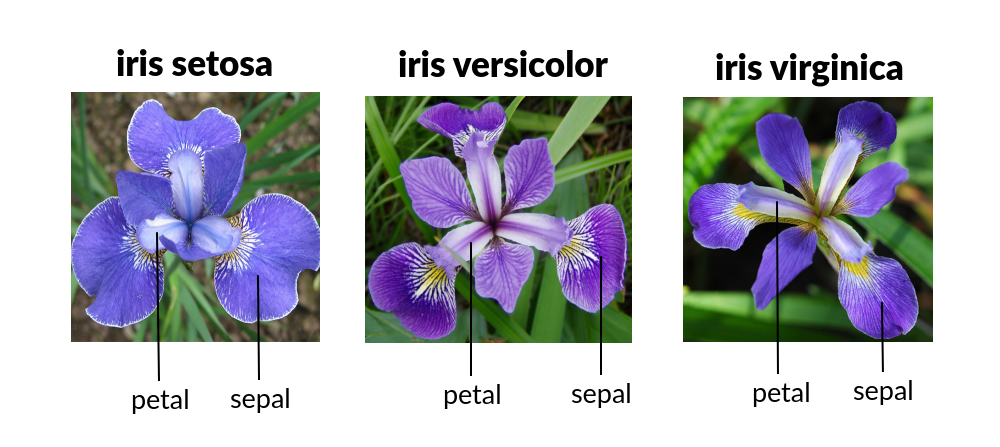

In [2]:
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#    name=fn
name="https://raw.githubusercontent.com/awar72/Fundamentos_ML/refs/heads/main/EA1/1.2.3_Iris.csv"
df = pd.read_csv(name, sep=",")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Frecuencia

Primero, veremos gráficamente la frecuencia del dato Longitud del Pétalo.

¿Qué está mostrando el gráfico? Explícalo.....


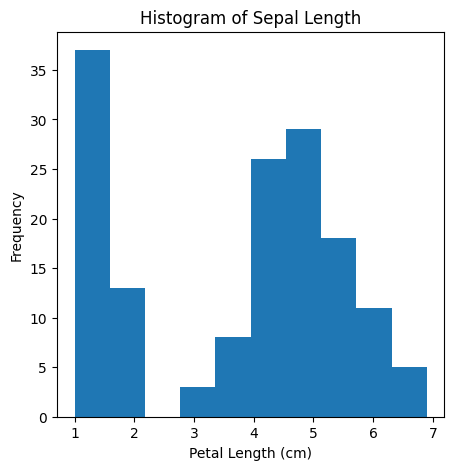

In [3]:
#Histograma


plt.figure(figsize=(5,5))
plt.hist(x = df['PetalLengthCm'], bins = 10)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Length")
plt.show()

¿Por qué hay un salto entre los 2 y 3 cm?

Y en este gráfico?, que se está mostrando?

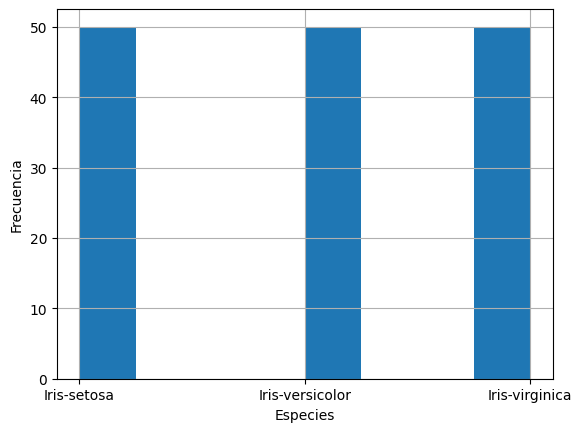

In [4]:
#Histograma 2
df['Species'].hist(bins=8)
plt.xlabel("Especies")
plt.ylabel("Frecuencia")
plt.show()

Podemos apreciar que esta forma de "presentar" los datos (gráficamente) es bastante eficiente y nos permite, rápidamente, revisarlos sin la necesidad de realizar cálculos.

## Medidas de Tendencia Central
Calculemos algunas de las medidas de tendencia central.

In [5]:
#Media
df['SepalLengthCm'].mean()

np.float64(5.843333333333334)

In [9]:
# Calcular el promedio de las columnas numéricas
numeric_columns = df.select_dtypes(include=np.number)
average_numeric_columns = numeric_columns.mean()
average_numeric_columns


,0
Id,75.500000
SepalLengthCm,5.843333
SepalWidthCm,3.054000
PetalLengthCm,3.758667
PetalWidthCm,1.198667


In [10]:
#Mediana
df['SepalLengthCm'].median()

5.8

In [11]:
# Mediana de todas las columnas
numeric_columns = df.select_dtypes(include=np.number)
average_numeric_columns = numeric_columns.median()
average_numeric_columns

,0
Id,75.50
SepalLengthCm,5.80
SepalWidthCm,3.00
PetalLengthCm,4.35
PetalWidthCm,1.30


In [12]:
#Moda
df['SepalLengthCm'].mode()

,SepalLengthCm
0,5.0


In [13]:
#Moda de todas las columnas
numeric_columns = df.select_dtypes(include=np.number)
average_numeric_columns = numeric_columns.mode()
average_numeric_columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.0,3.0,1.5,0.2
1,2,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
145,146,NaN,NaN,NaN,NaN
146,147,NaN,NaN,NaN,NaN
147,148,NaN,NaN,NaN,NaN
148,149,NaN,NaN,NaN,NaN


¿Qué significan cada uno de estos valores?


In [14]:
#Cuartiles
df['PetalWidthCm'].quantile([.25, .5, .75])

,PetalWidthCm
0.25,0.3
0.50,1.3
0.75,1.8


Un gráfico relacionado a los cuartiles y describe varias características importantes al mismo tiempo, tales como la dispersión y simetría es el diagrama de caja. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente.

Este gráfico indica.   


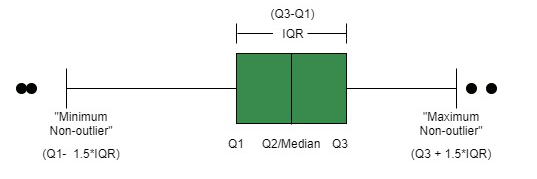

Mediana: el valor medio de los datos. marcado como Q2, representa el percentil 50.
Primer cuartil: el valor medio entre el "mínimo no atípico" y la mediana. marcado como Q1, representa el percentil 25.
Tercer cuartil: el valor medio entre “máximo no atípico” y la mediana. marcado como Q3, representa el percentil 75.
“Máximo no atípico”: calculado por(Q3 + 1.5 * IQR). Todos los valores por encima de este se consideran valores atípicos.
“Mínimo no atípico”: calculado por(Q1 - 1,5 * IQR). Todos los valores por debajo de este se consideran valores atípicos.

Mira lo siguiente. ¿Puedes interpretarlo? Explícalo.

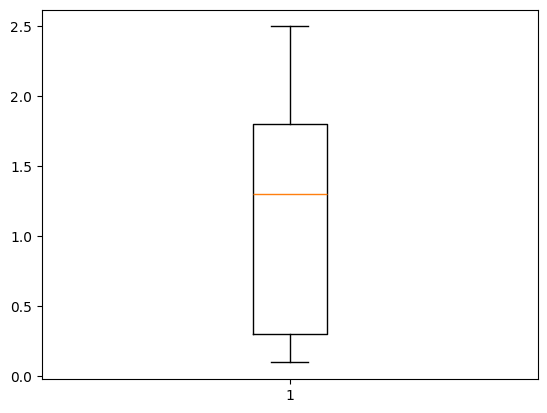

In [15]:
#Diagrama de Cajas
plt.boxplot(list(df['PetalWidthCm']))
plt.show()

Uno de los mayores usos para este tipo de gráfico es la comparación de datos. Ejecuta lo siguiente y explica el significado el gráfico.

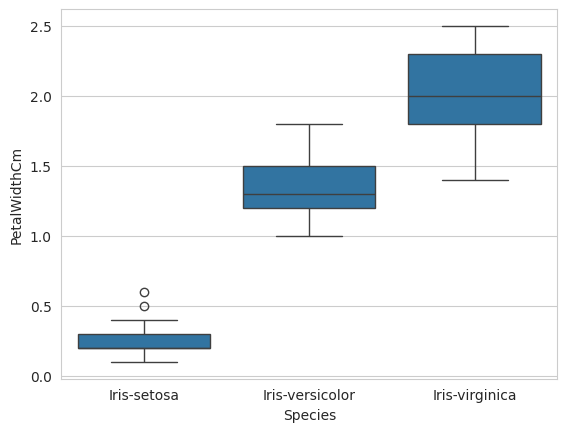

In [16]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='Species',y='PetalWidthCm',data=df)


#Resumen

¿Podríamos resumir todo con un sólo comando?, bueno, todo no, pero si algunas medidas más significativas. Veamos.

In [17]:
#Resumen estadístico
df['PetalWidthCm'].describe()

,PetalWidthCm
count,150.000000
mean,1.198667
std,0.763161
min,0.100000
25%,0.300000
50%,1.300000
75%,1.800000
max,2.500000


¿Podemos resumir estadísticas sobre una variable CUANTITATIVA?, ejecuta el siguiente comando y explica el significado de los resultados.

In [18]:
#Resumen estadístico
df['Species'].describe()

,Species
count,150
unique,3
top,Iris-setosa
freq,50


También podemos generar algunos gráficos resumidos

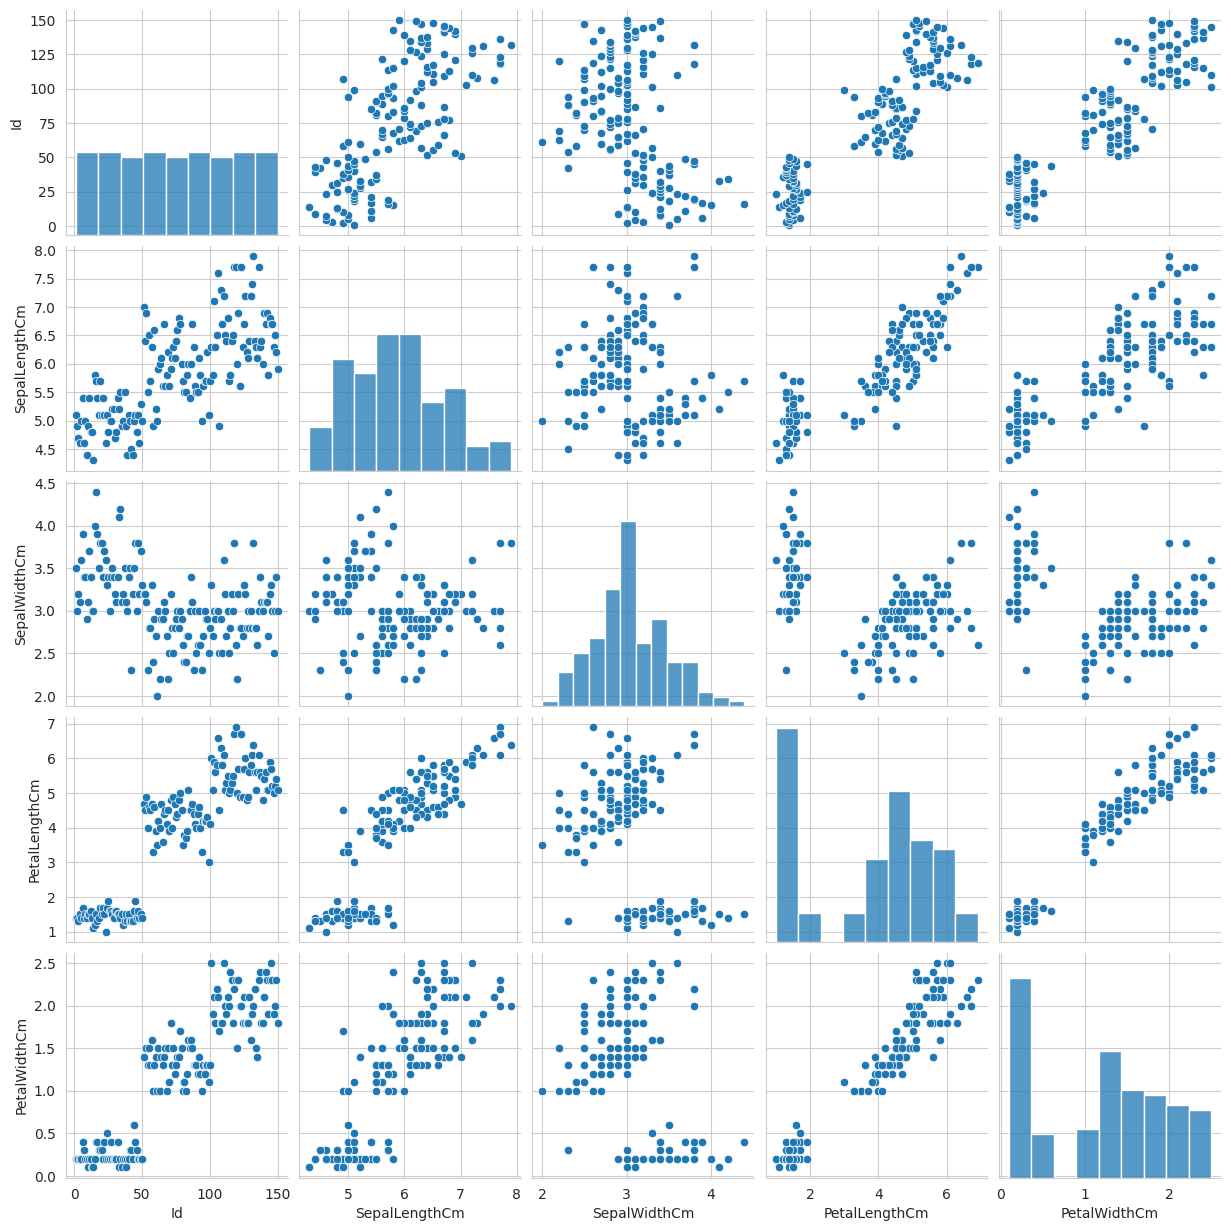

In [19]:
par=sns.pairplot(df)

Describe que indican estos gráficos...